In [14]:
from langgraph.graph import StateGraph , START,END
from typing import TypedDict, Dict,List
from IPython.display import Image,display

In [3]:
class AgentState(TypedDict):
    num1:int
    num2:int
    result:int

In [4]:
def add_val(state:AgentState)->AgentState:
    state['result'] = state['num1']+state['num2']
    return state

In [13]:
graph = StateGraph(AgentState)

graph.add_node('add_number',add_val)
graph.set_entry_point('add_number')
graph.set_finish_point('add_number')
app = graph.compile()

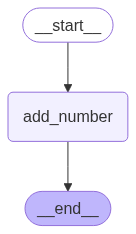

In [15]:
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
app.invoke({'num1':1,'num2':3})

{'num1': 1, 'num2': 3, 'result': 4}

In [17]:
# flow check 

In [36]:
from typing import TypedDict , List , Dict,Annotated 
from langgraph.graph import StateGraph , START,END

import operator

In [51]:
class AgentState(TypedDict):
    values:Annotated[list, operator.add]
    num1:Annotated[int, operator.add]
    num2:Annotated[int, operator.add]
    greet:Annotated[str, operator.add]
    result:Annotated[int, operator.add]
    final_val:Annotated[str,operator.add]

    

In [61]:
def add_val(state:AgentState)->AgentState:
    print(f" add_val node : {state}")
    state['values']= [x for x in range(1,10)]
    return state

def addition(state:AgentState) ->AgentState:
    print(f" addition node : {state}")
    state['result']= state['num1']+state['num2']
    return state

def greet(state:AgentState)->AgentState:
    print(f" greet node : {state}")
    state['greet'] = f"hello world I am AI"

    print(f" greet node : {state}")
    return state

def combine(state:AgentState)->AgentState:
    print(f" combine node : {state}")
    state['final_val'] =f" {state['greet']}  the sum is :  {state['result']} and the values is : {state['values']}"

    print(f" combine node : {state}")

    return state


graph = StateGraph(AgentState)

graph.add_node('greeting',greet)
graph.add_node('addition',addition)
graph.add_node('add_val',add_val)
graph.add_node('combine',combine)

graph.add_edge(START,'greeting')
graph.add_edge(START,'addition')
graph.add_edge(START,'add_val')
graph.add_edge('addition','combine')
graph.add_edge('greeting','combine')
graph.add_edge('add_val','combine')
graph.add_edge('combine',END)

app = graph.compile()

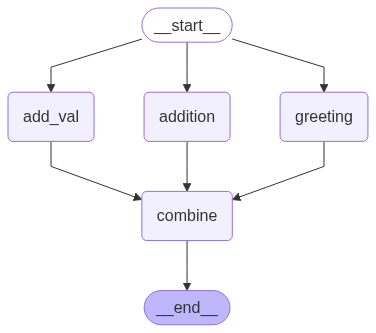

In [62]:
display(Image(app.get_graph().draw_mermaid_png()))

In [63]:
app.invoke({'num1':1,'num2':3})

 add_val node : {'values': [], 'num1': 1, 'num2': 3, 'greet': '', 'result': 0, 'final_val': ''}
 addition node : {'values': [], 'num1': 1, 'num2': 3, 'greet': '', 'result': 0, 'final_val': ''}
 greet node : {'values': [], 'num1': 1, 'num2': 3, 'greet': '', 'result': 0, 'final_val': ''}
 greet node : {'values': [], 'num1': 1, 'num2': 3, 'greet': 'hello world I am AI', 'result': 0, 'final_val': ''}
 combine node : {'values': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'num1': 4, 'num2': 12, 'greet': 'hello world I am AI', 'result': 4, 'final_val': ''}
 combine node : {'values': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'num1': 4, 'num2': 12, 'greet': 'hello world I am AI', 'result': 4, 'final_val': ' hello world I am AI  the sum is :  4 and the values is : [1, 2, 3, 4, 5, 6, 7, 8, 9]'}


{'values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'num1': 8,
 'num2': 24,
 'greet': 'hello world I am AIhello world I am AI',
 'result': 8,
 'final_val': ' hello world I am AI  the sum is :  4 and the values is : [1, 2, 3, 4, 5, 6, 7, 8, 9]'}